### Arima
Statistical self-regression method and moving average to forecast time series. A linear model is constructed including a specified number of terms and the data is prepared by a level of differentiation in order to make this stationary.  
  
We can use a value of 0 to turn off a parameter, in this way, that function in question will not be performed, for example, if in parameter d we set 0, no differentiation will be made in the data. In this example, we would have an ARMA model.

---

- **AR**: Autoregression - a model that uses the dependent relationship between observation and some lags;
- **I**: Integrated - Use of differentiation in raw observations, example: subtracting the value of an observation from its previous observation. The objective is to transform a time series into a stationary one;
- **MA**: Moving average - A model that uses the dependence between observation and residual error from a moving average model applied to lags.

```
residual_error = expected - predicted
```

- This is different from **Moving Average Smoothing**;
- Residual errors contain temporal structures that can be modeled;
- There are complex signs in residual errors;
- A model that predicts the residual error can be used to adjust the next errors and improve a model that learns from history.

---

The arima model contains some parameters:

```
ARIMA(p, d, q)
```

- **p**: The number of lags that will be included in this model;
- **d**: The number of times the observations will be differentiated;
- **q**: The size of a moving average window. Also called the moving average order.

In [1]:
import pandas as pd
series = pd.read_csv('champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [2]:
series.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt

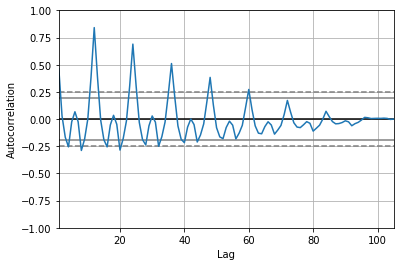

In [5]:
autocorrelation_plot(series)
plt.show()

In [6]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot as plt

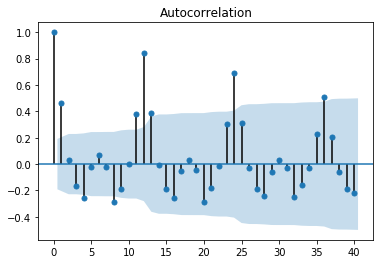

In [7]:
plot_acf(series, lags=40)
plt.show()

### Using ARIMA model for data analysis

In [8]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt

In [9]:
# ARIMA(p, d, q)
p, d, q = 7, 1, 1
model = ARIMA(series, order=(p, d, q))
# TODO: apply exhaustive tests to discover better parameters.

C:\Users\Gilberto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Gilberto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [10]:
model_fit = model.fit()

In [11]:
# summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -938.828
Method:                       css-mle   S.D. of innovations           1954.371
Date:                Thu, 25 Jun 2020   AIC                           1897.655
Time:                        18:31:31   BIC                           1924.099
Sample:                    02-01-1964   HQIC                          1908.369
                         - 09-01-1972                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.8412      5.224      4.564      0.000      13.603      34.079
ar.L1.D.Sales     0.4881      0.096      5.096      0.000       0.300       0.676
ar.L2.D.Sales    -0.2488      0.109     

In [12]:
# residuals plots
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

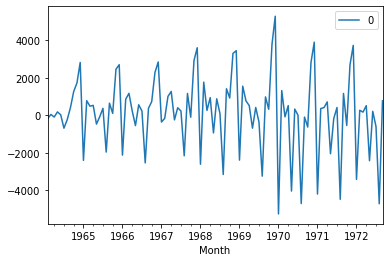

In [13]:
residuals.plot()
plt.show()

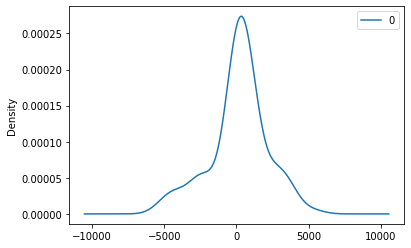

In [14]:
# residual density graph
residuals.plot(kind='kde')
plt.show()

In [15]:
# descritive stats
print(residuals.describe())

                 0
count   104.000000
mean    157.062570
std    1981.387347
min   -5258.558029
25%    -388.868915
50%     327.210283
75%     988.683094
max    5283.469171


### Predicting data with ARIMA using Walk Forward

In [16]:
X = series.values
X = X.astype('float32')

In [17]:
size = int(len(X) * .5)

In [18]:
train = X[0:size]
test = X[size:]

In [19]:
history = [x for x in train]

In [20]:
predictions = list()

In [21]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return diff

def inverse_difference(history, predict, interval = 1):
    return predict + history[-interval]

In [22]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt

In [23]:
for t in range(len(test)):
    months_in_year = 12
    
    diff = difference(history, months_in_year)
    
    model = ARIMA(diff, order=(0, 0, 1))
    
    model_fit = model.fit(trend='nc', disp=0)
    
    predicted_value = model_fit.forecast()[0]
    
    predicted_value = inverse_difference(history, predicted_value, months_in_year)
    
    predictions.append(predicted_value)
    
    real_value = test[t]
    
    history.append(real_value)
    
    print('Predicted Value = %.3f, Real Value = %3.f' % (predicted_value, real_value))

Predicted Value = 4455.107, Real Value = 4647
Predicted Value = 4567.683, Real Value = 4753
Predicted Value = 3691.090, Real Value = 3965
Predicted Value = 1684.956, Real Value = 1723
Predicted Value = 4744.831, Real Value = 5048
Predicted Value = 5474.600, Real Value = 6922
Predicted Value = 8556.384, Real Value = 9858
Predicted Value = 10925.314, Real Value = 11331
Predicted Value = 3726.032, Real Value = 4016
Predicted Value = 4360.617, Real Value = 3957
Predicted Value = 4059.717, Real Value = 4510
Predicted Value = 4223.040, Real Value = 4276
Predicted Value = 4659.008, Real Value = 4968
Predicted Value = 4823.543, Real Value = 4677
Predicted Value = 3931.824, Real Value = 3523
Predicted Value = 1629.240, Real Value = 1821
Predicted Value = 5091.520, Real Value = 5222
Predicted Value = 6951.792, Real Value = 6872
Predicted Value = 9839.749, Real Value = 10803
Predicted Value = 11548.695, Real Value = 13916
Predicted Value = 4687.849, Real Value = 2639
Predicted Value = 3636.164, R

In [24]:
# Evaluating
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 785.401


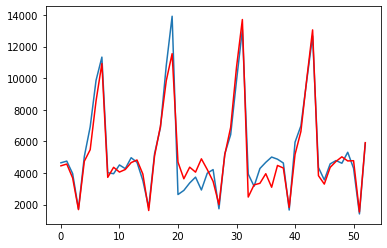

In [25]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

#### Analyzing Waste
```
Residual Error = Expected Value - Predicted Value
```
- Residual errors are errors in time series forecasts.
- An analysis of the errors can suggest improvements in the model.
    - Tendencies.
    - Seasonality.

In [26]:
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [27]:
residuals = DataFrame(residuals)

In [28]:
residuals.head()

,0
0,191.892715
1,185.316845
2,273.910366
3,38.044217
4,303.168595


In [29]:
residuals.describe()

,0
count,53.000000
mean,129.128258
std,782.127051
min,-2048.849021
25%,-264.302025
50%,130.479922
75%,405.685576
max,2367.304815


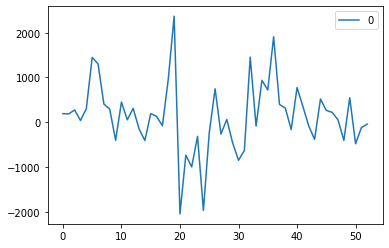

In [30]:
residuals.plot()
plt.show()

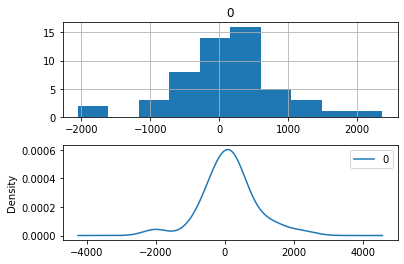

In [31]:
plt.figure()
plt.subplot(211)
residuals.hist(ax=plt.gca())

plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

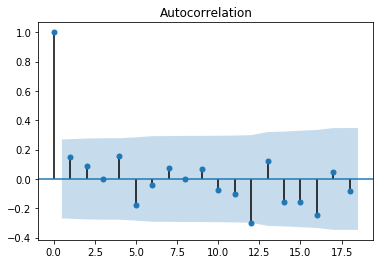

In [35]:
plot_acf(residuals, ax=plt.gca())
plt.show()

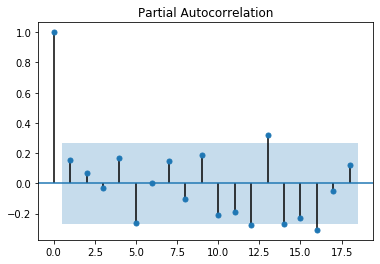

In [36]:
plot_pacf(residuals, ax=plt.gca())
plt.show()